<center>

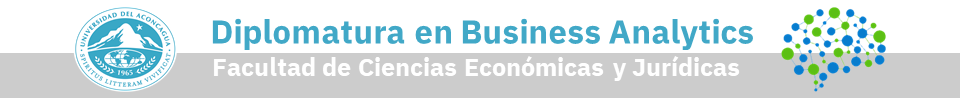

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Rotación de Clientes - Customer Churn

</font>
</center>

## Descripción del dataset

**El dataset pertenece a una compañía que ofrece servicio telefónico, internet, servicios web, etc.**
**La deserción de clientes (también conocida como pérdida de clientes) es una de las mayores causas de pérdida de cualquier organización. Si pudiéramos averiguar por qué un cliente se va y cuándo se va con una precisión razonable, ayudaría enormemente a la organización a diseñar estrategias de fidelización.**

---

CustomerID: ID único de cada cliente

Count: Valor de 1 para realizar sumas de clientes

Country: País donde vive cliente

State: Estado donde vive el cliente

City: Ciudad donde vive el cliente

Zip Code: Codigo postal del cliente

Lat Long: Combinación de la latitud y longitud del cliente

Latitude: Latitud

Longitude: Longitud

Gender: Genero del cliente

Senior Citizen: Indica si el cliente es mayor de 65 años (Si, No)

Partner: Indica si el cliente tiene pareja (Si, No)

Dependents: Indica si el cliente vive con dependientes (Si, No). Dependientes pueden ser hijos, parientes, padres

Tenure Months: Indica la cantidad de meses que el cliente forma parte de la compañia (Antiguedad)

Phone Service: Indica si el cliente tiene contratado servicio telefónico con la compañia (Si, No)

Multiple Lines: Indica si el cliente tiene contratadomúltiples líneas telefónicas (Si, No)

Internet Service: Indica si el cliente tiene contratado servicio de internet (No, DSL, Fiber Optic, Cable)

Online Security: Indica si el cliente tiene contratado el servicio de seguridad online (Si, No)

Online Backup: Indica si el cliente tiene contratado el servicio de backup - copia de seguridad (Si, No)

Device Protection: Indica si el cliente tiene contratado el servicio de protección del dispositivo (Si, No)

Tech Support: Indica si el cliente tiene contratado el servicio de soporte técnico para agilizar tiempos de respuesta (Si, No)

Streaming TV: Indica si el cliente tiene contratado un servicio de TV por streaming con un proveedor externo (Si, No). La compañia no genera cargos adicionales por este servicio

Streaming Movies: Indica si el cliente tiene contratado un servicio de películas y series por streaming con un proveedor externo (Si, No). La compañia no genera cargos adicionales por este servicio

Contract: Indica el contrato que posee el cliente con la compañía (Month-to-Month, One Year, Two Year)

Paperless Billing: Indica si el cliente ha elegido factura electrónica (Si, No)

Payment Method: Indica como el cliente paga su factura (Bank Withdrawal, Credit Card, Mailed Check)

Monthly Charge: Indica el monto MENSUAL de todos los servicios que paga el cliente

Total Charges: Indica el monto HISTÓRICO que ha pagado el cliente desde su primer factura

Churn Label: Yes = El cliente abandonó la empresa. No = El cliente continua siendo cliente

Churn Value: Es el valor binario de Churn Label Yes = 1, No = 0

Churn Score: Es un score generado de la probabilidad de que abandone la compañía

CLTV: Es el valor de vida del cliente (Customer Lifetime Value). Mientras más alto es el valor, más valioso es el cliente. Se debe monitorear clientes con alto CLTV

Churn Reason: Razón por la cual el cliente abandonó la compañia

# Carga de datos

In [ ]:
pip install pycaret[full]

     |████████████████████████████████| 266 kB 4.9 MB/s 
     |████████████████████████████████| 113 kB 62.3 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 1.7 MB 52.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 44 kB/s 
     |████████████████████████████████| 2.0 MB 28.1 MB/s 
     |████████████████████████████████| 271 kB 72.0 MB/s 
     |████████████████████████████████| 167 kB 71.2 MB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
     |████████████████████████████████| 6.8 MB 27.9 MB/s 
     |████████████████████████████████| 261 kB 67.8 MB/s 
     |████████████████████████████████| 1.3 MB 49.8 MB/s 
     |████████████████████████████████| 131 kB 66.1 MB/s 
     |████████████████████████████████| 40 kB 6.8 MB/s 
     |█████████████████████

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/train.csv")

In [3]:
train.describe()

,Unnamed: 0,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV
count,5274.000000,5274.0,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000
mean,3504.332954,1.0,93511.145810,36.276819,-119.787608,32.457907,64.526251,2277.733580,4402.844710
std,2031.058412,0.0,1870.031645,2.453289,2.166250,24.714333,30.095030,2274.193256,1184.379384
min,1.000000,1.0,90001.000000,32.555828,-124.301372,1.000000,18.250000,18.850000,2003.000000
25%,1736.250000,1.0,92086.000000,34.031441,-121.817504,9.000000,35.212500,389.137500,3470.250000
50%,3514.500000,1.0,93550.500000,36.319181,-119.718285,29.000000,70.300000,1378.600000,4521.000000
75%,5251.750000,1.0,95350.000000,38.224869,-118.039892,56.000000,89.800000,3803.725000,5387.000000
max,7031.000000,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,6499.000000


In [ ]:
ChurnReason = train["Churn Reason"]

In [ ]:
ChurnReason

0                                NaN
1                                NaN
2                                NaN
3                                NaN
4                                NaN
                    ...             
5269                             NaN
5270                             NaN
5271             Network reliability
5272    Competitor made better offer
5273                             NaN
Name: Churn Reason, Length: 5274, dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5274 non-null   int64  
 1   CustomerID         5274 non-null   object 
 2   Count              5274 non-null   int64  
 3   Country            5274 non-null   object 
 4   State              5274 non-null   object 
 5   City               5274 non-null   object 
 6   Zip Code           5274 non-null   int64  
 7   Lat Long           5274 non-null   object 
 8   Latitude           5274 non-null   float64
 9   Longitude          5274 non-null   float64
 10  Gender             5274 non-null   object 
 11  Senior Citizen     5274 non-null   object 
 12  Partner            5274 non-null   object 
 13  Dependents         5274 non-null   object 
 14  Tenure Months      5274 non-null   int64  
 15  Phone Service      5274 non-null   object 
 16  Multiple Lines     5274 

In [4]:
train.drop(['Unnamed: 0','CustomerID','Count','Country','Zip Code','Lat Long','Latitude','Longitude','Churn Reason','State','Phone Service','State','City'], axis = 'columns', inplace=True)

In [5]:
train.rename(columns={"Gender":"Genero","Senior Citizen":"Mayor65","Partner":"TienePareja","Dependents":"TieneDependientes","Tenure Months":"Antiguedad","Streaming TV":"StreamingTV","Streaming Movies":"StreamingMovies","Multiple Lines":"LineasTelefonicas","Online Backup":"OnlineBackup","Internet Service":"ServicioInternet","Online Security":"SeguridadOnline","Device Protection":"ProteccionDispositivos","Tech Support":"SoporteTecnologico","Contract":"TipoContrato","Paperless Billing":"FacturaElectronica","Payment Method":"MetodoPago","Monthly Charges":"CargoMensual","Total Charges":"CargosAcumulados","Churn Label":"Renuncio"}, inplace=True)

In [6]:
train = (train.replace('No internet service','No'))

In [7]:
train.LineasTelefonicas = train.LineasTelefonicas.replace({"No": "Una"})

In [8]:
train.LineasTelefonicas = train.LineasTelefonicas.replace({"Yes": "Multiples"})

In [9]:
train.LineasTelefonicas = train.LineasTelefonicas.replace({"No phone service": "No"})

In [19]:
train

,Genero,Mayor65,numGenero,TienePareja,numMayor65,TieneDependientes,numTienePareja,Antiguedad,numTieneDependientes,LineasTelefonicas,ServicioInternet,numLineasTelefonicas,SeguridadOnline,numServicioInternet,OnlineBackup,ProteccionDispositivos,SoporteTecnologico,StreamingTV,StreamingMovies,TipoContrato,numSeguridadOnline,FacturaElectronica,numStreamingMovies,numStreamingTV,numOnlineBackup,numMetodoPago,numFacturaElectronica,numTipoContrato,numSoporteTecnologico,numProteccionDispositivos,MetodoPago,CargoMensual,CargosAcumulados,Renuncio,CLTV
0,Male,No,1,Yes,0,No,1,45,0,Una,DSL,2,Yes,0,Yes,Yes,No,Yes,Yes,One year,1,No,1,1,1,0,0,1,0,1,Bank transfer (automatic),78.80,3597.50,No,4192
1,Female,No,0,Yes,0,No,1,4,0,Una,No,2,No,2,No,No,No,No,No,One year,0,No,0,0,0,0,0,1,0,0,Bank transfer (automatic),20.50,79.05,No,3233
2,Female,No,0,Yes,0,No,1,59,0,Multiples,Fiber optic,0,Yes,1,Yes,Yes,Yes,No,Yes,One year,1,Yes,1,0,1,1,1,1,1,1,Credit card (automatic),107.00,6152.30,No,4620
3,Female,No,0,Yes,0,No,1,46,0,Multiples,DSL,0,Yes,0,No,No,No,No,No,Month-to-month,1,No,0,0,0,2,0,0,0,0,Electronic check,53.10,2459.80,No,3358
4,Male,No,1,No,0,No,0,40,0,Una,DSL,2,No,0,No,No,Yes,No,No,Month-to-month,0,Yes,0,0,0,2,1,0,1,0,Electronic check,51.10,2092.90,No,3355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,Female,No,0,No,0,No,0,32,0,Una,No,2,No,2,No,No,No,No,No,One year,0,No,0,0,0,0,0,1,0,0,Bank transfer (automatic),19.75,624.15,No,4691
5270,Male,No,1,No,0,No,0,9,0,Una,Fiber optic,2,No,1,No,No,No,No,No,Month-to-month,0,No,0,0,0,3,0,0,0,0,Mailed check,70.05,657.50,No,3522
5271,Male,No,1,No,0,No,0,7,0,Multiples,Fiber optic,0,No,1,No,No,No,Yes,Yes,Month-to-month,0,Yes,1,1,0,2,1,0,0,0,Electronic check,93.85,635.60,Yes,3506
5272,Female,Yes,0,No,1,No,0,1,0,Una,Fiber optic,2,No,1,Yes,No,No,No,Yes,Month-to-month,0,Yes,1,0,1,2,1,0,0,0,Electronic check,86.00,86.00,Yes,5359


In [10]:
 import sklearn
 from sklearn.preprocessing import LabelEncoder

In [11]:
 convertir = LabelEncoder()

In [12]:
train.Genero = train.Genero.apply(str)
train.Mayor65 = train.Mayor65.apply(str)
train.TienePareja = train.TienePareja.apply(str)
train.TieneDependientes = train.TieneDependientes.apply(str)
train.LineasTelefonicas = train.LineasTelefonicas.apply(str)
train.ServicioInternet = train.ServicioInternet.apply(str)
train.SeguridadOnline = train.SeguridadOnline.apply(str)
train.ProteccionDispositivos = train.ProteccionDispositivos.apply(str)
train.SoporteTecnologico = train.SoporteTecnologico.apply(str)
train.TipoContrato = train.TipoContrato.apply(str)
train.FacturaElectronica = train.FacturaElectronica.apply(str)
train.MetodoPago = train.MetodoPago.apply(str)
train.OnlineBackup = train.OnlineBackup.apply(str)
train.StreamingTV = train.StreamingTV.apply(str)
train.StreamingMovies = train.StreamingMovies.apply(str)

In [13]:
train.insert(2,column="numGenero",value=convertir.fit_transform(train.Genero))
train.insert(4,column="numMayor65",value=convertir.fit_transform(train.Mayor65))
train.insert(6,column="numTienePareja",value=convertir.fit_transform(train.TienePareja))
train.insert(8,column="numTieneDependientes",value=convertir.fit_transform(train.TieneDependientes))
train.insert(11,column="numLineasTelefonicas",value=convertir.fit_transform(train.LineasTelefonicas))
train.insert(13,column="numServicioInternet",value=convertir.fit_transform(train.ServicioInternet))
train.insert(20,column="numSeguridadOnline",value=convertir.fit_transform(train.SeguridadOnline))
train.insert(22,column="numProteccionDispositivos",value=convertir.fit_transform(train.ProteccionDispositivos))
train.insert(22,column="numSoporteTecnologico",value=convertir.fit_transform(train.SoporteTecnologico))
train.insert(22,column="numTipoContrato",value=convertir.fit_transform(train.TipoContrato))
train.insert(22,column="numFacturaElectronica",value=convertir.fit_transform(train.FacturaElectronica))
train.insert(22,column="numMetodoPago",value=convertir.fit_transform(train.MetodoPago))
train.insert(22,column="numOnlineBackup",value=convertir.fit_transform(train.OnlineBackup))
train.insert(22,column="numStreamingTV",value=convertir.fit_transform(train.StreamingTV))
train.insert(22,column="numStreamingMovies",value=convertir.fit_transform(train.StreamingMovies))

In [14]:
trainnum = train.drop(columns=["Genero","Mayor65","TienePareja","TieneDependientes","LineasTelefonicas","ServicioInternet","SeguridadOnline","ProteccionDispositivos","SoporteTecnologico","TipoContrato","FacturaElectronica","MetodoPago","StreamingTV","OnlineBackup","StreamingMovies"])

In [15]:
trainnum

,numGenero,numMayor65,numTienePareja,Antiguedad,numTieneDependientes,numLineasTelefonicas,numServicioInternet,numSeguridadOnline,numStreamingMovies,numStreamingTV,numOnlineBackup,numMetodoPago,numFacturaElectronica,numTipoContrato,numSoporteTecnologico,numProteccionDispositivos,CargoMensual,CargosAcumulados,Renuncio,CLTV
0,1,0,1,45,0,2,0,1,1,1,1,0,0,1,0,1,78.80,3597.50,No,4192
1,0,0,1,4,0,2,2,0,0,0,0,0,0,1,0,0,20.50,79.05,No,3233
2,0,0,1,59,0,0,1,1,1,0,1,1,1,1,1,1,107.00,6152.30,No,4620
3,0,0,1,46,0,0,0,1,0,0,0,2,0,0,0,0,53.10,2459.80,No,3358
4,1,0,0,40,0,2,0,0,0,0,0,2,1,0,1,0,51.10,2092.90,No,3355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,0,0,0,32,0,2,2,0,0,0,0,0,0,1,0,0,19.75,624.15,No,4691
5270,1,0,0,9,0,2,1,0,0,0,0,3,0,0,0,0,70.05,657.50,No,3522
5271,1,0,0,7,0,0,1,0,1,1,0,2,1,0,0,0,93.85,635.60,Yes,3506
5272,0,1,0,1,0,2,1,0,1,0,1,2,1,0,0,0,86.00,86.00,Yes,5359


In [ ]:
trainnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   numGenero                  5274 non-null   int64  
 1   numMayor65                 5274 non-null   int64  
 2   numTienePareja             5274 non-null   int64  
 3   Antiguedad                 5274 non-null   int64  
 4   numTieneDependientes       5274 non-null   int64  
 5   numLineasTelefonicas       5274 non-null   int64  
 6   numServicioInternet        5274 non-null   int64  
 7   numSeguridadOnline         5274 non-null   int64  
 8   numStreamingMovies         5274 non-null   int64  
 9   numStreamingTV             5274 non-null   int64  
 10  numOnlineBackup            5274 non-null   int64  
 11  numMetodoPago              5274 non-null   int64  
 12  numFacturaElectronica      5274 non-null   int64  
 13  numTipoContrato            5274 non-null   int64

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
trainnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   numGenero                  5274 non-null   int64  
 1   numMayor65                 5274 non-null   int64  
 2   numTienePareja             5274 non-null   int64  
 3   Antiguedad                 5274 non-null   int64  
 4   numTieneDependientes       5274 non-null   int64  
 5   numLineasTelefonicas       5274 non-null   int64  
 6   numServicioInternet        5274 non-null   int64  
 7   numSeguridadOnline         5274 non-null   int64  
 8   numStreamingMovies         5274 non-null   int64  
 9   numStreamingTV             5274 non-null   int64  
 10  numOnlineBackup            5274 non-null   int64  
 11  numMetodoPago              5274 non-null   int64  
 12  numFacturaElectronica      5274 non-null   int64  
 13  numTipoContrato            5274 non-null   int64

In [ ]:
trainnum = setup(data= trainnum, target = "Renuncio", train_size=0.75, session_id=14)

,Description,Value
0,session_id,14
1,Target,Renuncio
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(5274, 20)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#mejor_modelo = compare_models()

In [ ]:
#print(mejor_modelo)

In [ ]:
#models()

In [ ]:
xgboost = create_model('xgboost', kwargs=None)
print(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8081,0.8456,0.5660,0.6667,0.6122,0.4859,0.4887
1,0.7879,0.8467,0.5189,0.6250,0.5670,0.4281,0.4314
2,0.7652,0.7909,0.5283,0.5657,0.5463,0.3882,0.3886
3,0.8131,0.8654,0.6168,0.6667,0.6408,0.5148,0.5155
4,0.7879,0.8286,0.5514,0.6211,0.5842,0.4425,0.4439
5,0.7468,0.8117,0.5000,0.5300,0.5146,0.3435,0.3438
6,0.7797,0.8129,0.5283,0.6022,0.5628,0.4164,0.4180
7,0.7797,0.8380,0.5566,0.5960,0.5756,0.4271,0.4276
8,0.7949,0.8680,0.4906,0.6582,0.5622,0.4320,0.4399
9,0.8051,0.8691,0.5472,0.6667,0.6010,0.4737,0.4778


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', kwargs=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=14,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', use_label_encoder=True, validate_parameters=1, ...)


In [ ]:
optimizar_xgboost = tune_model(xgboost)
print(optimizar_xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7677,0.8207,0.6509,0.5565,0.6000,0.4377,0.4404
1,0.7677,0.8214,0.5189,0.5729,0.5446,0.3891,0.3900
2,0.7399,0.7865,0.6415,0.5113,0.5690,0.3862,0.3913
3,0.7904,0.8471,0.6729,0.6000,0.6344,0.4881,0.4897
4,0.7500,0.7841,0.6449,0.5308,0.5823,0.4063,0.4102
5,0.7671,0.7937,0.5566,0.5673,0.5619,0.4033,0.4033
6,0.7646,0.8103,0.6132,0.5556,0.5830,0.4195,0.4205
7,0.7620,0.8210,0.6226,0.5500,0.5841,0.4183,0.4199
8,0.7595,0.8268,0.6509,0.5433,0.5923,0.4237,0.4272
9,0.8076,0.8548,0.6226,0.6471,0.6346,0.5041,0.5043


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', kwargs=None,
              learning_rate=0.4, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=14,
              reg_alpha=4, reg_lambda=1e-06, scale_pos_weight=2.0,
              subsample=0.2, tree_method='auto', use_label_encoder=True,
              validate_parameters=1, ...)


In [ ]:
evaluate_model(optimizar_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(optimizar_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7642,0.8085,0.6275,0.5475,0.5848,0.4212,0.4231


,Antiguedad,CargoMensual,CargosAcumulados,CLTV,numGenero_0,numMayor65_1,numTienePareja_0,numTieneDependientes_0,numLineasTelefonicas_0,numLineasTelefonicas_1,numLineasTelefonicas_2,numServicioInternet_0,numServicioInternet_1,numServicioInternet_2,numSeguridadOnline_1,numStreamingMovies_1,numStreamingTV_1,numOnlineBackup_0,numMetodoPago_0,numMetodoPago_1,numMetodoPago_2,numMetodoPago_3,numFacturaElectronica_1,numTipoContrato_0,numTipoContrato_1,numTipoContrato_2,numSoporteTecnologico_1,numProteccionDispositivos_0,Renuncio,Label,Score
0,59.0,44.299999,2666.750000,5905.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,No,Yes,0.8320
1,25.0,95.150002,2395.699951,3273.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,No,No,0.6113
2,69.0,89.949997,6143.149902,6363.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,Yes,No,0.6944
3,48.0,29.900000,1388.750000,2617.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,No,No,0.8062
4,1.0,49.950001,49.950001,5230.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,No,Yes,0.6066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,4.0,25.450001,84.199997,2616.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,No,No,0.9698
1315,59.0,96.650002,5580.799805,5266.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,No,No,0.9947
1316,32.0,79.300003,2570.000000,5242.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,No,No,0.9764
1317,14.0,18.799999,255.550003,5751.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,No,No,0.9819


In [ ]:
final_xgboost = finalize_model(optimizar_xgboost)
print(final_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', kwargs=None,
              learning_rate=0.4, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=14,
              reg_alpha=4, reg_lambda=1e-06, scale_pos_weight=2.0,
              subsample=0.2, tree_method='auto', use_label_encoder=True,
              validate_parameters=1, ...)


In [ ]:
predict_model(final_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.881,0.9507,0.8539,0.7376,0.7915,0.7088,0.7125


,Antiguedad,CargoMensual,CargosAcumulados,CLTV,numGenero_0,numMayor65_1,numTienePareja_0,numTieneDependientes_0,numLineasTelefonicas_0,numLineasTelefonicas_1,numLineasTelefonicas_2,numServicioInternet_0,numServicioInternet_1,numServicioInternet_2,numSeguridadOnline_1,numStreamingMovies_1,numStreamingTV_1,numOnlineBackup_0,numMetodoPago_0,numMetodoPago_1,numMetodoPago_2,numMetodoPago_3,numFacturaElectronica_1,numTipoContrato_0,numTipoContrato_1,numTipoContrato_2,numSoporteTecnologico_1,numProteccionDispositivos_0,Renuncio,Label,Score
0,59.0,44.299999,2666.750000,5905.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,No,No,0.8879
1,25.0,95.150002,2395.699951,3273.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,No,No,0.8611
2,69.0,89.949997,6143.149902,6363.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Yes,0.6369
3,48.0,29.900000,1388.750000,2617.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,No,No,0.9648
4,1.0,49.950001,49.950001,5230.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,No,No,0.5786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,4.0,25.450001,84.199997,2616.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,No,No,0.9612
1315,59.0,96.650002,5580.799805,5266.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,No,No,0.9784
1316,32.0,79.300003,2570.000000,5242.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,No,No,0.6582
1317,14.0,18.799999,255.550003,5751.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,No,No,0.9932


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
save_model(final_xgboost,"/content/drive/MyDrive/Modelos/modelo_xgboost_PyCaret")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Renuncio',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                learning_rate=0.4, max_delta_step=0,
                                max_depth=11, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=-1, num_pa

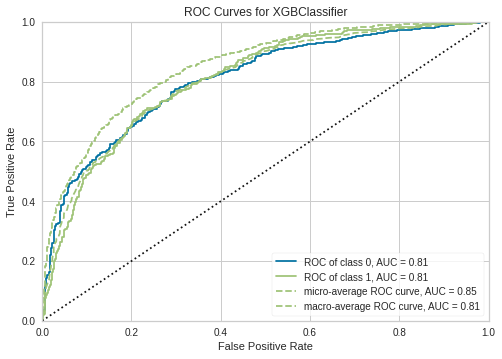

In [ ]:
plot_model(optimizar_xgboost, plot = 'auc')

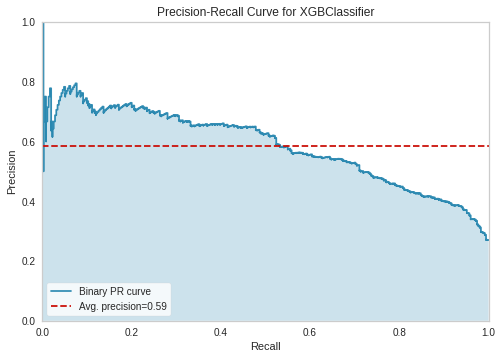

In [ ]:
plot_model(optimizar_xgboost, plot = 'pr')

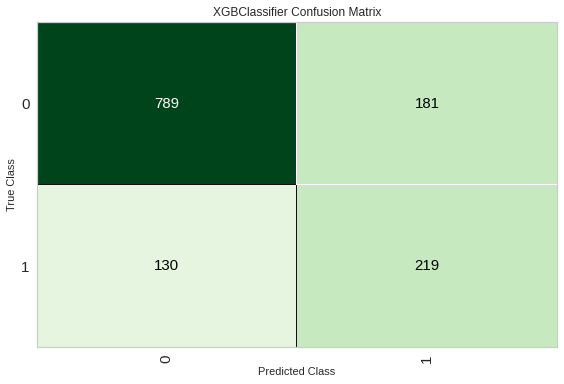

In [ ]:
plot_model(optimizar_xgboost, plot = 'confusion_matrix')

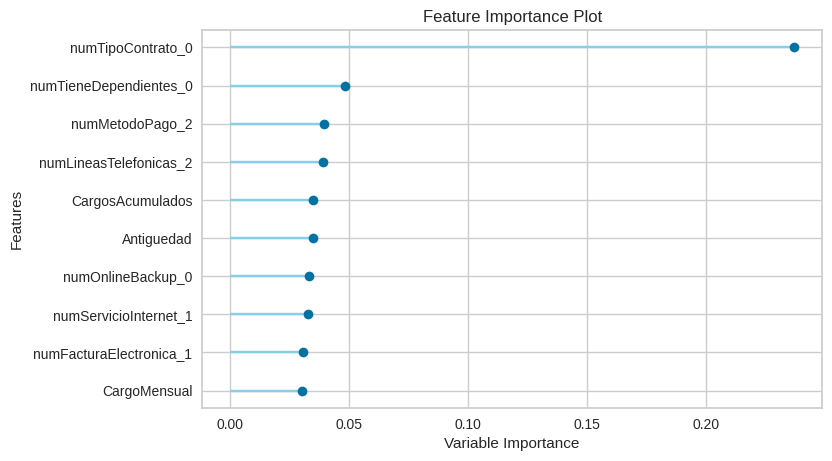

In [ ]:
plot_model(optimizar_xgboost, plot = "feature")